<a href="https://colab.research.google.com/github/JulianDPastrana/signal_analysis/blob/main/seniales_sinusoidales_sinteticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INFORMACIÓN:
	Frecuencia de operación: 60 Hz
	Frecuencia de muestreo: 6000.0 Hz
	Muestras tomadas: 500



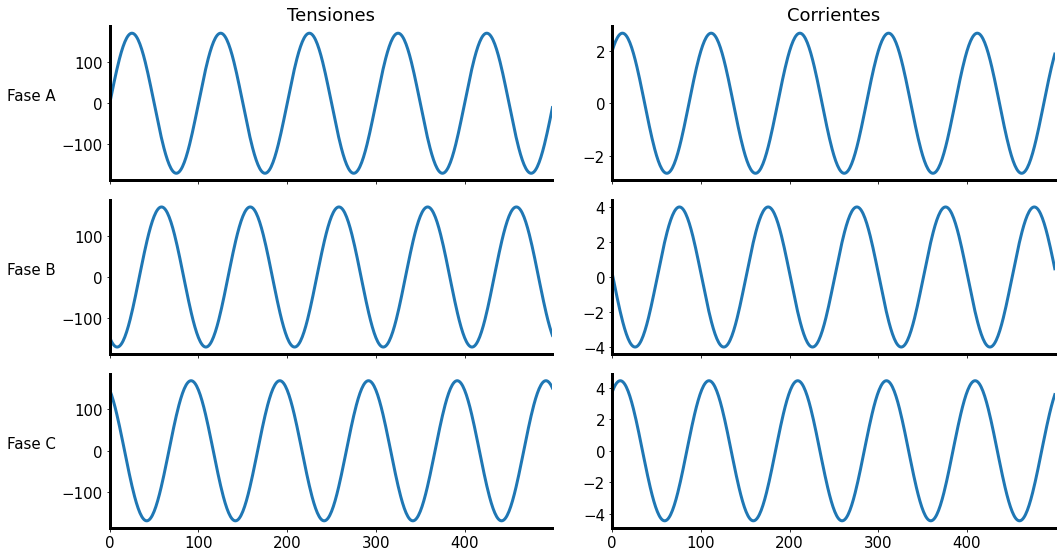

In [11]:
import numpy as np
import matplotlib.pyplot as plt


def signal_generation():
    """
    Retorna señales de tensiones y corrientes trifasicas desbalanceadas.
    Las señales de tensión presentan un valor RMS de 120 V en secuencia
    positiva. Las señales de corriente son generadas a partir de cargas
    lineales aleatorias.

    Parámetros
    ----------
    None :

    Retorna
    -------
    (tensiones, corrientes): tupla de arreglos (3, N)
        Tupla que contiene dos arreglos de (3, N) siendo N el número de
        muestras, correspondiente a las muestras por fase de tensiones y
        corrientes respectivamente
    """

    plt.rcParams.update({'font.size': 15})
    plt.rcParams['axes.spines.top'] = False
    plt.rcParams['axes.spines.right'] = False
    plt.rcParams['axes.linewidth'] = 3
    plt.rcParams['lines.linewidth'] = 3.0
    plt.rcParams['figure.figsize'] = 15, 8
    plt.rcParams['axes.xmargin'] = 0
    
    F = 60
    Ts = 1/(100*F)
    t = np.arange(0.0, 5/60, Ts)
    rs = np.random.RandomState()
    N = t.size
    voltages = np.empty([3, N], dtype=complex)
    voltages[0] = 169.7056*np.exp(2j*np.pi*F*t)
    voltages[1] = voltages[0]*np.exp(-2j*np.pi/3)
    voltages[2] = voltages[1]*np.exp(-2j*np.pi/3)

    R = rs.uniform(
        low=10,
        high=50,
        size=(3, 1)
    )

    X = rs.uniform(
        low=-50,
        high=50,
        size=(3, 1)
    )

    Z = R + 1j*X

    currents = voltages/Z

    voltages = voltages.imag
    currents = currents.imag

    info = '\n'.join([
        f'INFORMACIÓN:',
        f'\tFrecuencia de operación: {F} Hz',
        f'\tFrecuencia de muestreo: {1/Ts} Hz',
        f'\tMuestras tomadas: {N}\n'])

    print(info)

    col_labels = ["Tensiones", "Corrientes"]
    row_labels = ["Fase A", "Fase B", "Fase C"]
    fig, axs = plt.subplots(3, 2, sharex=True)
    for i in range(3):
        axs[i, 0].plot(voltages[i])
        axs[i, 1].plot(currents[i])

    for ax, col in zip(axs[0], col_labels):
        ax.set_title(col)

    for ax, row in zip(axs[:,0], row_labels):
        ax.set_ylabel(row, rotation=0, labelpad=30)

    fig.tight_layout()
    plt.show()

    return voltages, currents


if __name__ == '__main__':
    tensiones, corrientes = signal_generation()      